In [1]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/main/datasets/framingham.csv

--2025-10-21 21:51:54--  https://github.com/javierherrera1996/lecture_analytics/raw/main/datasets/framingham.csv
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/datasets/framingham.csv [following]
--2025-10-21 21:51:54--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/datasets/framingham.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 195955 (191K) [text/plain]
Saving to: ‘framingham.csv’

framingham.csv      100%[===================>] 191.36K  --.-KB/s    in 0.03s   

2025-10-21 21:51:55 (5.58 MB/s) - ‘framingham.csv’ save

## LOGISTIC REGRESSION - HEART DISEASE PREDICTION

###Introduction
World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression
Data Preparation

###Source
The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.
Variables
Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

###Demographic:
    • Sex: male or female(Nominal)
    • Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
    Behavioral
    • Current Smoker: whether or not the patient is a current smoker (Nominal)
    • Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)
###Medical( history)
    • BP Meds: whether or not the patient was on blood pressure medication (Nominal)
    • Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
    • Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
    • Diabetes: whether or not the patient had diabetes (Nominal)
###Medical(current)
    • Tot Chol: total cholesterol level (Continuous)
    • Sys BP: systolic blood pressure (Continuous)
    • Dia BP: diastolic blood pressure (Continuous)
    • BMI: Body Mass Index (Continuous)
    • Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
    • Glucose: glucose level (Continuous)
    Predict variable (desired target)
    • 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)


### Cargar Datos

In [2]:
import pandas as pd
data = pd.read_csv("framingham.csv")

In [3]:
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


### Descriptiva

#### Cuantos datos tiene la tabla

In [4]:
# Cuántos datos (filas, columnas)
print(data.shape)

(4238, 16)


#### Medidas de tendencia central de las variables.

In [5]:
# Medidas de tendencia central (media, mediana, etc.) para variables numéricas
print(data.describe())

              male          age    education  currentSmoker   cigsPerDay  \
count  4238.000000  4238.000000  4133.000000    4238.000000  4209.000000   
mean      0.429212    49.584946     1.978950       0.494101     9.003089   
std       0.495022     8.572160     1.019791       0.500024    11.920094   
min       0.000000    32.000000     1.000000       0.000000     0.000000   
25%       0.000000    42.000000     1.000000       0.000000     0.000000   
50%       0.000000    49.000000     2.000000       0.000000     0.000000   
75%       1.000000    56.000000     3.000000       1.000000    20.000000   
max       1.000000    70.000000     4.000000       1.000000    70.000000   

            BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  4185.000000      4238.000000   4238.000000  4238.000000  4188.000000   
mean      0.029630         0.005899      0.310524     0.025720   236.721585   
std       0.169584         0.076587      0.462763     0.158316    44.590334   

#### Grafico de Barras con el número de hombres y mujeres

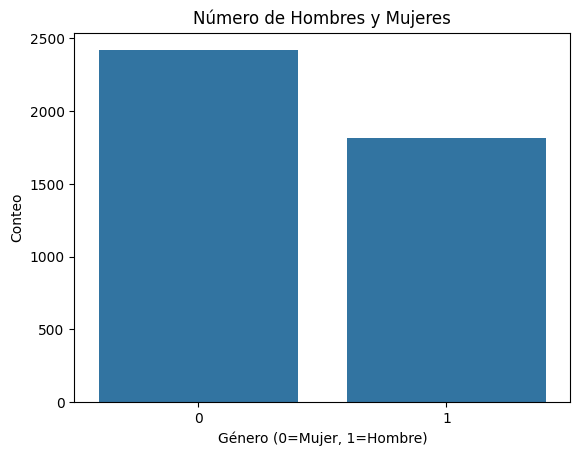

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de barras para hombres (1) y mujeres (0)
sns.countplot(x='male', data=data)
plt.title('Número de Hombres y Mujeres')
plt.xlabel('Género (0=Mujer, 1=Hombre)')
plt.ylabel('Conteo')
plt.show()

#### Realice un ggrafico de Barras de TenYearCHD

*   Elemento de lista
*   Elemento de lista



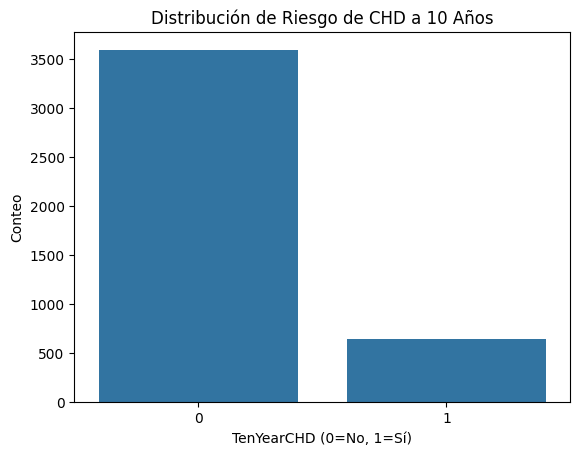

In [7]:
# Gráfico de barras para TenYearCHD
sns.countplot(x='TenYearCHD', data=data)
plt.title('Distribución de Riesgo de CHD a 10 Años')
plt.xlabel('TenYearCHD (0=No, 1=Sí)')
plt.ylabel('Conteo')
plt.show()

#### Realice un grafico de densidad del BMI

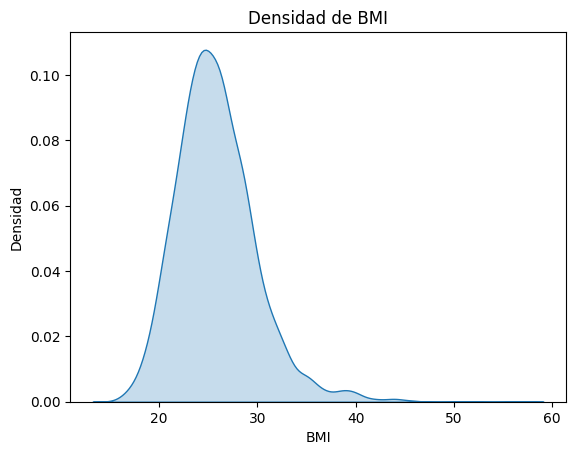

In [8]:
# Gráfico de densidad de BMI
sns.kdeplot(data['BMI'], fill=True)
plt.title('Densidad de BMI')
plt.xlabel('BMI')
plt.ylabel('Densidad')
plt.show()

#### Realice un grafico de densidad del BMI que diferencie entre hombres y mujeres, ¿Cual tiene en promedio mayor BMI?

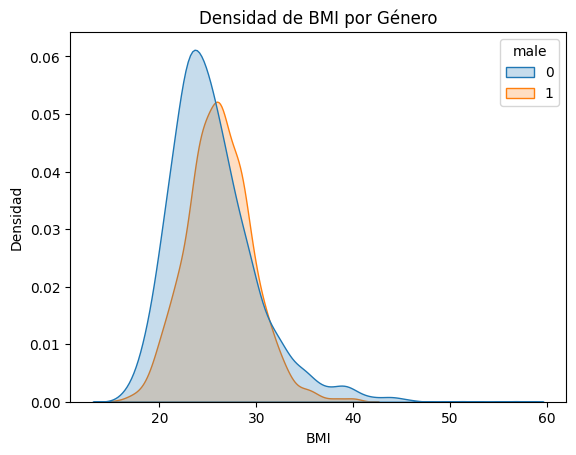

male
0    25.512636
1    26.185656
Name: BMI, dtype: float64


In [9]:
# Densidad de BMI por género
sns.kdeplot(data=data, x='BMI', hue='male', fill=True)
plt.title('Densidad de BMI por Género')
plt.xlabel('BMI')
plt.ylabel('Densidad')
plt.show()

# Promedio por género (para responder la pregunta)
print(data.groupby('male')['BMI'].mean())

#### Realice un mapa de calor entre las variables (heatmap) y diga cual es el par de variables más correlacionadas. Recuerde que para sacar la correlacion puede usar data.corr()

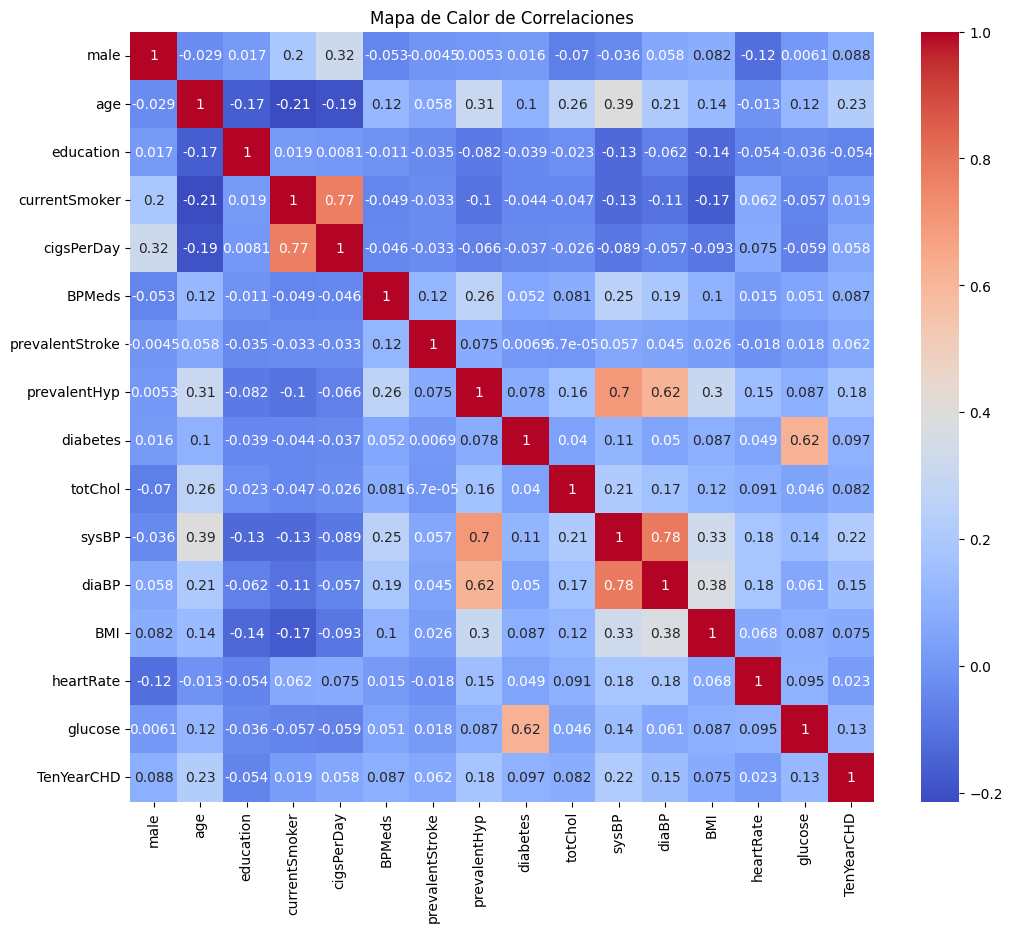

In [10]:
# Mapa de calor de correlaciones
corr = data.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlaciones')
plt.show()

¿Haga un boxplot por genero para cada una de estas tres variables :BMI,	heartRate y	glucose.¿hay outliers ?

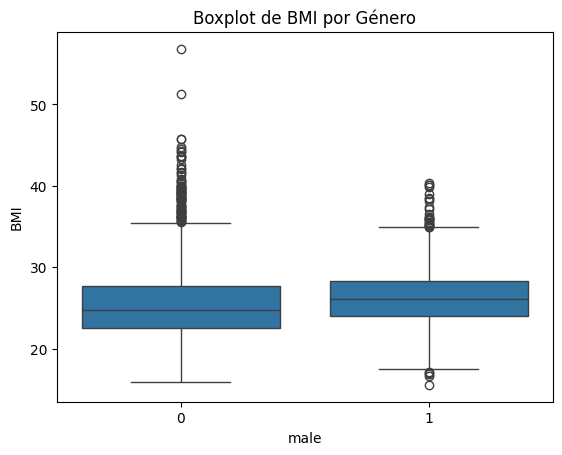

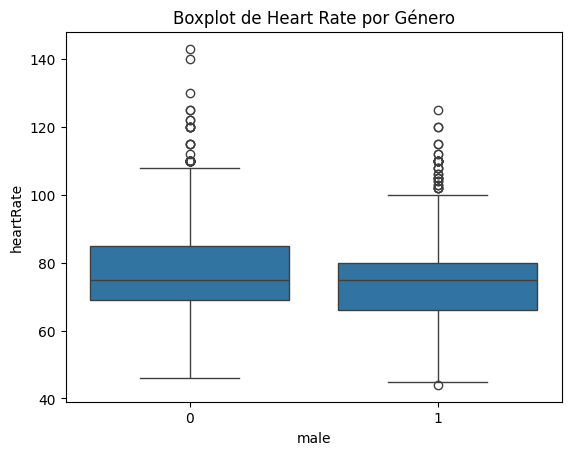

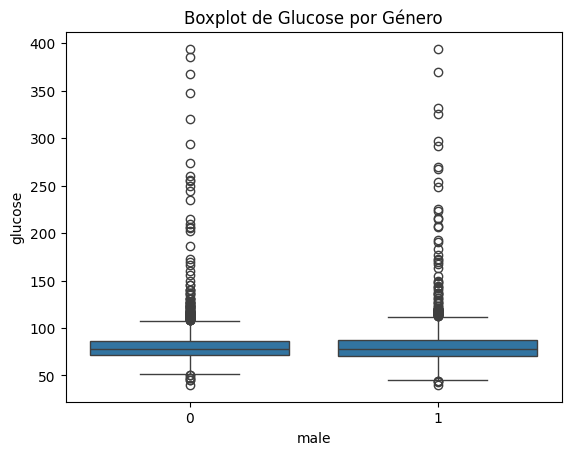

In [11]:
# Boxplot para BMI por género
sns.boxplot(x='male', y='BMI', data=data)
plt.title('Boxplot de BMI por Género')
plt.show()

# Boxplot para heartRate por género
sns.boxplot(x='male', y='heartRate', data=data)
plt.title('Boxplot de Heart Rate por Género')
plt.show()

# Boxplot para glucose por género
sns.boxplot(x='male', y='glucose', data=data)
plt.title('Boxplot de Glucose por Género')
plt.show()

### Manipulación de Datos

#### De cada variable cuente cuantos datos nulos hay

In [12]:
# Conteo de nulos por variable
print(data.isnull().sum())

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


#### Utilice dropna para borrar los datos faltantes ¿cuantos datos quedan ?

In [13]:
# Borrar nulos
data_clean = data.dropna()
print(data_clean.shape)

(3656, 16)


#### Seleccione sus variables X y su variable y

In [14]:
# Variables X (features) e y (target)
X = data_clean.drop('TenYearCHD', axis=1)  # Todas menos target
y = data_clean['TenYearCHD']

#### Divida aleatoriamente la tabla en test y train, dejando el 30% de los datos para test y usando un random state de 123.
1. ¿De que tamaño queda cada dataset?

In [15]:
from sklearn.model_selection import train_test_split

# División train/test (70/30, random_state=123)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
print(X_train.shape, X_test.shape)

(2559, 15) (1097, 15)


#### Entrene el modelo de Regresion logistica usando datos de entrenamiento

In [16]:
from sklearn.linear_model import LogisticRegression

# Entrenar modelo
model = LogisticRegression(max_iter=1000)  # Aumenta iteraciones si no converge
model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

#### Imprima los coeficientes y diga cual tiene un efecto mayor sobre desarrollar una enfermedad cardiaca

In [17]:
# Coeficientes
coef = pd.DataFrame(model.coef_[0], index=X.columns, columns=['Coeficiente'])
print(coef.sort_values(by='Coeficiente', ascending=False))

                 Coeficiente
prevalentStroke     1.195263
male                0.511674
diabetes            0.127929
prevalentHyp        0.091700
BPMeds              0.080718
age                 0.064267
currentSmoker       0.061670
cigsPerDay          0.027404
BMI                 0.020042
sysBP               0.015417
glucose             0.006923
totChol             0.003394
diaBP              -0.003693
heartRate          -0.004641
education          -0.036369


#### Usando los datos de test calcule la matriz de confusión, el accuracy, el recall, la precision y el f1-score.

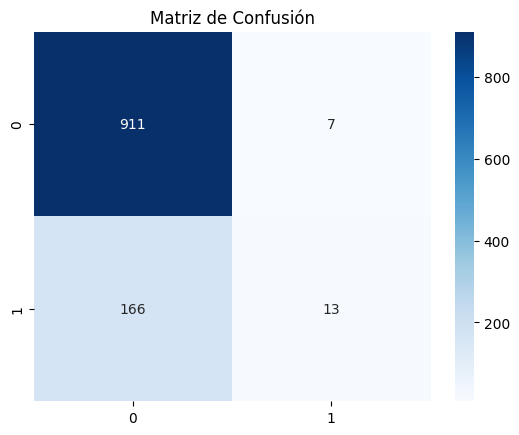

Accuracy: 0.8422971741112124
Recall: 0.07262569832402235
Precision: 0.65
F1-Score: 0.1306532663316583


In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

# Predicciones
y_pred = model.predict(X_test)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.show()

# Métricas
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('F1-Score:', f1_score(y_test, y_pred))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Pinte la curva ROC, y saque el valor, busque en internet como interpretarla e interprete

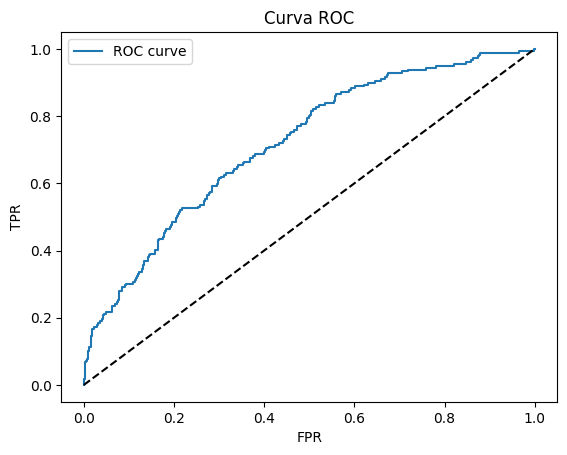

AUC: 0.7178892661968574


In [19]:
from sklearn.metrics import roc_curve, roc_auc_score

# Probabilidades
y_prob = model.predict_proba(X_test)[:, 1]

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Curva ROC')
plt.legend()
plt.show()

# AUC
print('AUC:', roc_auc_score(y_test, y_prob))